In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = h5py.File("ics.hdf5")
particles = data["PartType0"]

In [3]:
pos = particles["Coordinates"]
vel = particles["Velocities"]

In [4]:
posSplit = np.array_split(pos, 3, axis=1)
x = posSplit[0].reshape(len(particles["Masses"]))
y = posSplit[1].reshape(len(particles["Masses"]))

velSplit = np.array_split(vel, 3, axis=1)
vx = velSplit[0].reshape(len(particles["Masses"]))

/var/folders/hq/p_tw4dkd06j3b79xb0rpp_lh0000gp/T/ipykernel_8787/2457131654.py:6: RuntimeWarning: invalid value encountered in divide
  finalHist = weightedHist/histNumbers


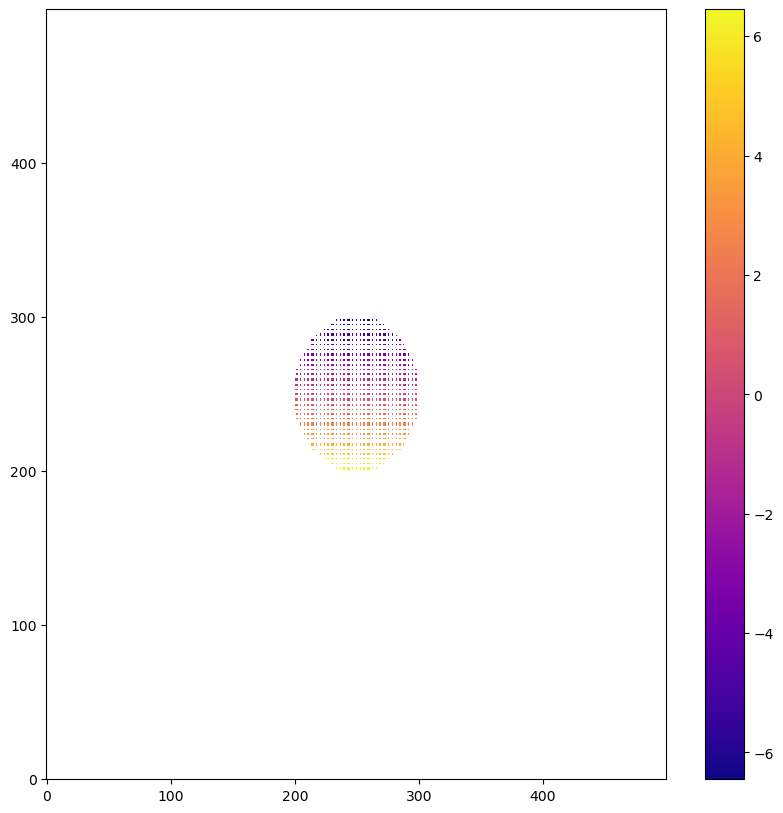

In [5]:

# Binning the data 
weightedHist, xb, yb = np.histogram2d(y, x, weights=vx, bins=(500, 500))
histNumbers, xb, yb = np.histogram2d(y, x, bins=(500, 500))

# Combining the histogrammed and non histogrammed data
finalHist = weightedHist/histNumbers
finalHist = np.ma.masked_where(histNumbers < 1, finalHist)

# Checking if we need to log the cmap and plotting
plt.figure(figsize=(10,10))
plt.imshow(finalHist, aspect="auto", cmap="plasma", origin="lower")
plt.colorbar()
plt.show()
